## Importing necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif
from sklearn.feature_selection import SelectPercentile
from genetic_selection import GeneticSelectionCV

In [5]:
data = pd.read_csv(r'C:\Users\Dr. U P Singh\Desktop\ISA PROJECT\DATASET\all.csv',nrows = 200000)
data.head()

,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,DoH
0,72.21.91.42,192.168.20.191,443,51041,2020-01-14 15:49:01,4.544040,11256331,2.477164e+06,159324,35062.191354,...,0.580949,1.107852e-07,0.000333,0.000027,0.000016,0.000014,0.096659,0.038228,12.454823,False
1,192.168.20.191,195.201.169.48,51043,443,2020-01-14 15:49:03,8.171041,930,1.138166e+02,11936,1460.768585,...,1.745138,3.224052e+00,1.795565,0.886579,0.103698,0.000900,1.308024,0.493259,2.025273,False
2,192.168.20.191,96.17.115.57,51021,443,2020-01-14 15:49:03,0.033776,162,4.796305e+03,138,4085.741355,...,0.500002,0.000000e+00,0.000000,0.033683,0.033683,0.033683,-10.000000,-10.000000,0.000000,False
3,192.168.20.191,96.114.14.140,50308,443,2020-01-14 15:49:03,0.060723,108,1.778568e+03,120,1976.186947,...,0.577350,0.000000e+00,0.000000,0.060687,0.060687,0.060687,-10.000000,-10.000000,0.000000,False
4,192.168.20.191,23.78.199.198,50983,443,2020-01-14 15:49:03,0.019545,55,2.814019e+03,66,3376.822717,...,1.000000,0.000000e+00,0.000000,0.019545,0.019545,0.019545,-10.000000,-10.000000,0.000000,False


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 35 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   SourceIP                                200000 non-null  object 
 1   DestinationIP                           200000 non-null  object 
 2   SourcePort                              200000 non-null  int64  
 3   DestinationPort                         200000 non-null  int64  
 4   TimeStamp                               200000 non-null  object 
 5   Duration                                200000 non-null  float64
 6   FlowBytesSent                           200000 non-null  int64  
 7   FlowSentRate                            200000 non-null  float64
 8   FlowBytesReceived                       200000 non-null  int64  
 9   FlowReceivedRate                        200000 non-null  float64
 10  PacketLengthVariance                    2000

In [6]:
data.describe()

,SourcePort,DestinationPort,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,...,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation
count,200000.000000,200000.000000,200000.000000,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,200000.000000,200000.000000,...,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,198289.000000,200000.000000,198289.000000,200000.000000,200000.000000
mean,55826.181665,2172.048540,7.440621,2.481956e+03,8.930446e+03,4.138672e+04,2.794565e+04,1.442257e+05,253.247917,261.018875,...,0.801294,1.067223,1.430609e+00,0.206892,0.121758,0.054478,0.028023,-3.917869,-3.194660,0.545368
std,10596.021798,9810.109977,15.524360,3.032173e+04,1.796961e+05,3.864548e+05,1.589908e+05,3.078262e+05,283.004638,272.164856,...,1.012612,0.621931,1.221105e+01,1.185294,0.799692,0.637875,0.606437,4.974411,5.425105,1.225331
min,443.000000,443.000000,0.000000,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000,54.000000,...,-10.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000,0.000004,-1.000000,-10.000000,-10.000000,0.000000
25%,54125.000000,443.000000,0.027014,5.500000e+01,2.725979e+02,6.600000e+01,5.232016e+02,3.025000e+01,5.500000,60.500000,...,0.508485,0.639345,0.000000e+00,0.000000,0.015231,0.015219,0.000061,-10.000000,-10.000000,0.000000
50%,57631.000000,443.000000,0.256482,4.080000e+02,1.930990e+03,4.280000e+02,2.617074e+03,2.424758e+03,49.241708,95.271341,...,1.000000,1.000000,1.440000e-08,0.000120,0.024780,0.024968,0.015234,-1.509572,0.569581,0.005424
75%,60708.000000,443.000000,7.933046,2.037000e+03,3.622234e+03,6.380000e+03,6.163086e+03,2.646502e+05,514.441684,385.353992,...,1.000341,1.160221,1.586456e-04,0.012595,0.044141,0.034299,0.026901,0.276325,1.151515,0.715006
max,65534.000000,65525.000000,157.235105,1.125633e+07,4.586538e+07,4.775828e+07,6.750000e+06,2.790438e+07,5282.460002,2232.744681,...,7.645960,8.777577,5.062235e+02,22.499412,45.011506,45.011506,45.011506,2.867107,5.589000,73.665470


### Differentiating the Depedent Feature from Independent Features

In [6]:
X = data.drop(labels=['DoH', 'TimeStamp', 'SourceIP', 'DestinationIP','ResponseTimeTimeMedian','ResponseTimeTimeSkewFromMedian'], axis = 1)
y = data['DoH']
X.shape, y.shape

((200000, 29), (200000,))

### Train-Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

### Removing Constant, Quasi-Constant and Duplicate Features

In [9]:
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [10]:
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)
X_train_T = pd.DataFrame(X_train_T).T
X_test_T = pd.DataFrame(X_test_T).T

# Mutual Information based Feature Selection

In [11]:
mi = mutual_info_classif(X_train_T, y_train) 
len(mi)

29

In [45]:
mi

array([0.00644468, 0.00578333, 0.00696703, 0.01098976, 0.00370208,
       0.00434955, 0.00350303, 0.01312845, 0.01334176, 0.01443336,
       0.02025903, 0.01156721, 0.00917832, 0.01111902, 0.00643526,
       0.00576423, 0.00576448, 0.00583466, 0.00592873, 0.00387598,
       0.00199762, 0.00673664, 0.00628012, 0.00367361, 0.00364222,
       0.00302811, 0.00673208, 0.01766721, 0.00428554])

In [46]:
mi = pd.Series(mi)
mi.index = X_train_T.columns

In [47]:
mi.sort_values(ascending=False, inplace = True)

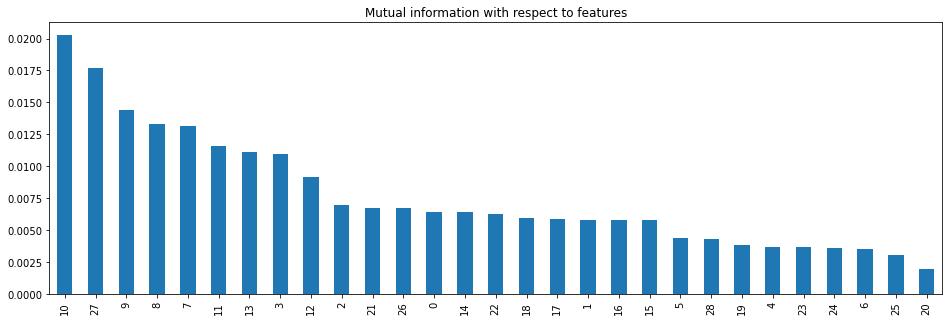

In [48]:
plt.title('Mutual information with respect to features')
mi.plot.bar(figsize = (16,5))
plt.show()

### Selecting Top 30 Percentile Features

In [79]:
sel = SelectPercentile(mutual_info_classif, percentile=30).fit(X_train_T, y_train)
X_train_T.columns[sel.get_support()]

Int64Index([3, 7, 8, 9, 10, 11, 12, 13, 27], dtype='int64')

In [80]:
len(X_train_T.columns[sel.get_support()])

9

### Transforming Training & Testing Dataset

In [81]:
X_train_mi = sel.transform(X_train_T)
X_test_mi = sel.transform(X_test_T)
X_train_mi.shape

(160000, 9)

## Applying Machine Learning Models for Test Dataset Prediction:
### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve

from sklearn.metrics import classification_report, precision_score, recall_score
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))
    print('Precision score: ')
    print(precision_score(y_test, y_pred, average='macro'),'\n')
    print('Recall score: ')
    print(recall_score(y_test, y_pred, average='macro'),'\n')
    print('Classification Report: ')
    print(classification_report(y_test, y_pred))
    
    pred_prob1 = clf.predict_proba(X_test)
    fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(y_test))]
    p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    
    # matplotlib
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    plt.show();

In [27]:
%%time
run_randomForest(X_train_mi, X_test_mi, y_train, y_test)

NameError: name 'X_train_mi' is not defined

Accuracy Score with Original Features:

Accuracy on test set: 
0.998
Precision score: 
0.9806663072264878 

Recall score: 
0.839751404186014 

Classification Report: 
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     39769
        True       0.96      0.68      0.80       231

    accuracy                           1.00     40000
   macro avg       0.98      0.84      0.90     40000
weighted avg       1.00      1.00      1.00     40000



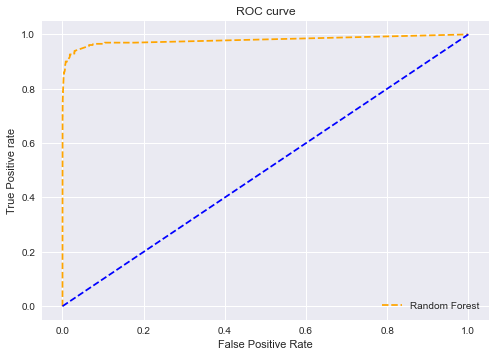

Wall time: 22.9 s


In [30]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

#### Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
def run_DecisionTree(X_train, X_test, y_train, y_test):
    clf = DecisionTreeClassifier(criterion='gini', random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))
    print('Precision score: ')
    print(precision_score(y_test, y_pred, average='macro'),'\n')
    print('Recall score: ')
    print(recall_score(y_test, y_pred, average='macro'),'\n')
    print('Classification Report: ')
    print(classification_report(y_test, y_pred))
    
    pred_prob1 = clf.predict_proba(X_test)
    fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(y_test))]
    p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    
    # matplotlib
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Decision Tree')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    plt.show();

In [88]:
%%time
run_DecisionTree(X_train_mi, X_test_mi, y_train, y_test)

Accuracy on test set: 
0.9974
Precision score: 
0.9011222392984204 

Recall score: 
0.8631208867573876 

Classification Report: 
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     39769
        True       0.80      0.73      0.76       231

    accuracy                           1.00     40000
   macro avg       0.90      0.86      0.88     40000
weighted avg       1.00      1.00      1.00     40000

Wall time: 3.92 s


Accuracy Score with Original Features:

Accuracy on test set: 
0.997375
Precision score: 
0.8744716715306431 

Recall score: 
0.9082988348622385 

Classification Report: 
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     39769
        True       0.75      0.82      0.78       231

    accuracy                           1.00     40000
   macro avg       0.87      0.91      0.89     40000
weighted avg       1.00      1.00      1.00     40000



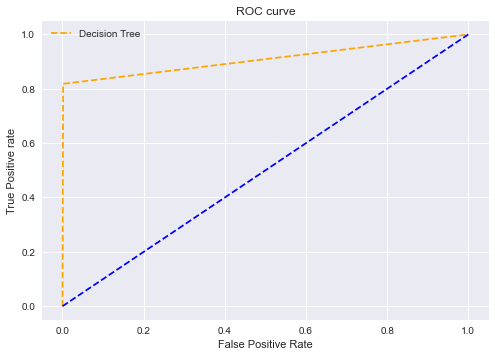

Wall time: 16 s


In [42]:
%%time
run_DecisionTree(X_train, X_test, y_train, y_test)

#### KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
def run_KNN(X_train, X_test, y_train, y_test):
    knn = KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))
    print('Precision score: ')
    print(precision_score(y_test, y_pred, average='macro'),'\n')
    print('Recall score: ')
    print(recall_score(y_test, y_pred, average='macro'),'\n')
    print('Classification Report: ')
    print(classification_report(y_test, y_pred))
    
    pred_prob1 = knn.predict_proba(X_test)
    fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(y_test))]
    p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    
    # matplotlib
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='KNN')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    plt.show();

In [92]:
%%time
run_KNN(X_train_mi, X_test_mi, y_train, y_test)

Accuracy on test set: 
0.995525
0.995525
Precision score: 
0.8084264516846169 

Recall score: 
0.7911642658430358 

Classification Report: 
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     39769
        True       0.62      0.58      0.60       231

    accuracy                           1.00     40000
   macro avg       0.81      0.79      0.80     40000
weighted avg       1.00      1.00      1.00     40000

Wall time: 1min 21s


Accuracy Score with Original Features:

Accuracy on test set: 
0.995225
Precision score: 
0.7898642786571859 

Recall score: 
0.8060769014652693 

Classification Report: 
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     39769
        True       0.58      0.61      0.60       231

    accuracy                           1.00     40000
   macro avg       0.79      0.81      0.80     40000
weighted avg       1.00      1.00      1.00     40000



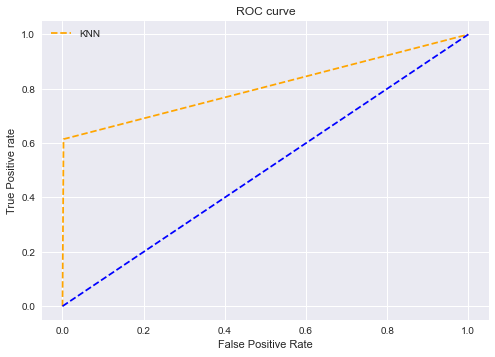

Wall time: 17.4 s


In [44]:
%%time
run_KNN(X_train, X_test, y_train, y_test)

#### Logistic Regression

In [45]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
def run_LogisticRegression(X_train, X_test, y_train, y_test):
    model = LogisticRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))
    print('Precision score: ')
    print(precision_score(y_test, y_pred, average='macro'),'\n')
    print('Recall score: ')
    print(recall_score(y_test, y_pred, average='macro'),'\n')
    print('Classification Report: ')
    print(classification_report(y_test, y_pred))
    
    pred_prob1 = model.predict_proba(X_test)
    fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(y_test))]
    p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    
    # matplotlib
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    plt.show();

In [96]:
%%time
run_LogisticRegression(X_train_mi, X_test_mi, y_train, y_test)

Accuracy on test set: 
0.9943
0.9943
Precision score: 
0.8049039014602823 

Recall score: 
0.5172531542819958 

Classification Report: 
              precision    recall  f1-score   support

       False       0.99      1.00      1.00     39769
        True       0.62      0.03      0.07       231

    accuracy                           0.99     40000
   macro avg       0.80      0.52      0.53     40000
weighted avg       0.99      0.99      0.99     40000

Wall time: 4.22 s


Accuracy Score with Original Features:

Accuracy on test set: 
0.994425
Precision score: 
0.8722614045618247 

Recall score: 
0.5259237355468088 

Classification Report: 
              precision    recall  f1-score   support

       False       0.99      1.00      1.00     39769
        True       0.75      0.05      0.10       231

    accuracy                           0.99     40000
   macro avg       0.87      0.53      0.55     40000
weighted avg       0.99      0.99      0.99     40000



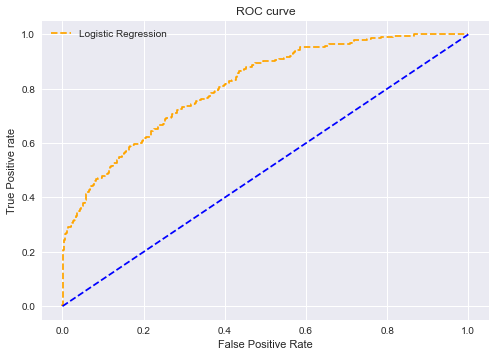

Wall time: 7.17 s


In [46]:
%%time
run_LogisticRegression(X_train, X_test, y_train, y_test)

### MI Feature Selection based Accuracy Scores Comparison

In [102]:
result = {"Random Forest": 0.9982,"Decision Tree": 0.9974,"KNN": 0.99545 ,"Logistic Regression": 0.9943}

In [103]:
models = list(result.keys())
accuracys = list(result.values())

In [104]:
fig = plt.figure(figsize = (20, 10))

<Figure size 1440x720 with 0 Axes>

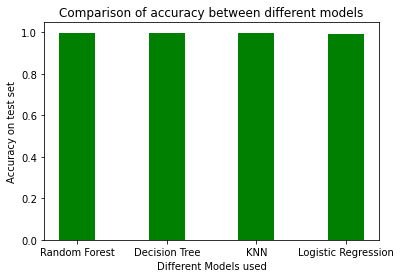

In [107]:
plt.bar(models, accuracys, color ='green',
        width = 0.4)

plt.xlabel("Different Models used")
plt.ylabel("Accuracy on test set")
plt.title("Comparison of accuracy between different models")
plt.show()

# Genetic Algorithm based Feature Selection

In [113]:
from genetic_selection import GeneticSelectionCV
from sklearn.tree import DecisionTreeClassifier

In [14]:
estimator = DecisionTreeClassifier()
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="accuracy", max_features=5,
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X_train, y_train)
print('Features:', X_train.columns[model.support_])

Features: Index(['SourcePort', 'FlowBytesReceived', 'PacketLengthStandardDeviation',
       'PacketLengthMedian', 'PacketLengthCoefficientofVariation'],
      dtype='object')


In [8]:
xx_train = X_train[['SourcePort', 'FlowBytesReceived', 'PacketLengthStandardDeviation',
                    'PacketLengthMedian', 'PacketLengthCoefficientofVariation']]
yy_train = y_train
xx_test = X_test[['SourcePort', 'FlowBytesReceived', 'PacketLengthStandardDeviation',
                    'PacketLengthMedian', 'PacketLengthCoefficientofVariation']]

### Decision tree

In [102]:
def run_DecisionTree(X_train, X_test, y_train, y_test):
    clf = DecisionTreeClassifier(criterion='gini', random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))
    print('Precision score: ')
    print(precision_score(y_test, y_pred, average='macro'),'\n')
    print('Recall score: ')
    print(recall_score(y_test, y_pred, average='macro'),'\n')
    print('Classification Report: ')
    print(classification_report(y_test, y_pred))

run_DecisionTree(xx_train, xx_test, yy_train, y_test)

Accuracy on test set: 
0.99735
Precision score: 
0.8857839954701364 

Recall score: 
0.8824631075630598 

Classification Report: 
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     39769
        True       0.77      0.77      0.77       231

    accuracy                           1.00     40000
   macro avg       0.89      0.88      0.88     40000
weighted avg       1.00      1.00      1.00     40000



### Random Forest Classifier

In [103]:
from sklearn.ensemble import RandomForestClassifier
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))
    print('Precision score: ')
    print(precision_score(y_test, y_pred, average='macro'),'\n')
    print('Recall score: ')
    print(recall_score(y_test, y_pred, average='macro'),'\n')
    print('Classification Report: ')
    print(classification_report(y_test, y_pred))
    
run_randomForest(xx_train, xx_test, yy_train, y_test)

Accuracy on test set: 
0.99825
Precision score: 
0.9818554845080696 

Recall score: 
0.8613964258310356 

Classification Report: 
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     39769
        True       0.97      0.72      0.83       231

    accuracy                           1.00     40000
   macro avg       0.98      0.86      0.91     40000
weighted avg       1.00      1.00      1.00     40000



### KNN

In [104]:
from sklearn.neighbors import KNeighborsClassifier
def run_KNN(X_train, X_test, y_train, y_test):
    knn = KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))
    print('Precision score: ')
    print(precision_score(y_test, y_pred, average='macro'),'\n')
    print('Recall score: ')
    print(recall_score(y_test, y_pred, average='macro'),'\n')
    print('Classification Report: ')
    print(classification_report(y_test, y_pred))
    
run_KNN(xx_train, xx_test, yy_train, y_test)

Accuracy on test set: 
0.992675
Precision score: 
0.6508408634538152 

Recall score: 
0.6046650467053293 

Classification Report: 
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     39769
        True       0.31      0.21      0.25       231

    accuracy                           0.99     40000
   macro avg       0.65      0.60      0.62     40000
weighted avg       0.99      0.99      0.99     40000



### Logistic Regression

In [105]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
def run_LogisticRegression(X_train, X_test, y_train, y_test):
    model = LogisticRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))
    print('Precision score: ')
    print(precision_score(y_test, y_pred, average='macro'),'\n')
    print('Recall score: ')
    print(recall_score(y_test, y_pred, average='macro'),'\n')
    print('Classification Report: ')
    print(classification_report(y_test, y_pred))
    
run_LogisticRegression(xx_train, xx_test, yy_train, y_test)

Accuracy on test set: 
0.994225
Precision score: 
0.4971125 

Recall score: 
0.5 

Classification Report: 
              precision    recall  f1-score   support

       False       0.99      1.00      1.00     39769
        True       0.00      0.00      0.00       231

    accuracy                           0.99     40000
   macro avg       0.50      0.50      0.50     40000
weighted avg       0.99      0.99      0.99     40000



### Artifical Neural Network (ANN)

#### Genetic Algorithm

In [9]:
import tensorflow as tf

In [11]:
ann1 = tf.keras.models.Sequential()
ann1.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann1.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann1.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
ann1.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
ann1.fit(xx_train,yy_train,batch_size=32,epochs = 10)

Epoch 1/10
5000/5000 [==============================] - 18s 3ms/step - loss: 170.4042 - accuracy: 0.9657
Epoch 2/10
5000/5000 [==============================] - 17s 3ms/step - loss: 3.0270 - accuracy: 0.9891
Epoch 3/10
5000/5000 [==============================] - 12s 2ms/step - loss: 3.0531 - accuracy: 0.9894
Epoch 4/10
5000/5000 [==============================] - 11s 2ms/step - loss: 2.1789 - accuracy: 0.9896
Epoch 5/10
5000/5000 [==============================] - 14s 3ms/step - loss: 2.1235 - accuracy: 0.9895
Epoch 6/10
5000/5000 [==============================] - 15s 3ms/step - loss: 1.7256 - accuracy: 0.9906
Epoch 7/10
5000/5000 [==============================] - 15s 3ms/step - loss: 1.3340 - accuracy: 0.9907
Epoch 8/10
5000/5000 [==============================] - 17s 3ms/step - loss: 1.2181 - accuracy: 0.9919
Epoch 9/10
5000/5000 [==============================] - 17s 3ms/step - loss: 1.0012 - accuracy: 0.9934
Epoch 10/10
5000/5000 [==============================] - 21s 4ms/step -

In [12]:
ann1.evaluate(xx_test, y_test)[1]

1250/1250 [==============================] - 4s 3ms/step - loss: 0.0637 - accuracy: 0.9943


0.9942749738693237

#### Mututal Information

In [59]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
ann.fit(X_train_mi,yy_train,batch_size=32,epochs = 10)

Epoch 1/10
5000/5000 [==============================] - 21s 4ms/step - loss: 57.5811 - accuracy: 0.9899
Epoch 2/10
5000/5000 [==============================] - 17s 3ms/step - loss: 3.3428 - accuracy: 0.9943
Epoch 3/10
5000/5000 [==============================] - 20s 4ms/step - loss: 1.6730 - accuracy: 0.9939
Epoch 4/10
5000/5000 [==============================] - 23s 5ms/step - loss: 1.5029 - accuracy: 0.9949
Epoch 5/10
5000/5000 [==============================] - 22s 4ms/step - loss: 1.6915 - accuracy: 0.9949
Epoch 6/10
5000/5000 [==============================] - 23s 5ms/step - loss: 1.5351 - accuracy: 0.9948
Epoch 7/10
5000/5000 [==============================] - 20s 4ms/step - loss: 0.8696 - accuracy: 0.9952
Epoch 8/10
5000/5000 [==============================] - 19s 4ms/step - loss: 1.1101 - accuracy: 0.9949
Epoch 9/10
5000/5000 [==============================] - 19s 4ms/step - loss: 0.5414 - accuracy: 0.9948
Epoch 10/10
5000/5000 [==============================] - 23s 5ms/step - 

In [69]:
ann.evaluate(X_test_mi, y_test)[1]

1250/1250 [==============================] - 1s 1ms/step - loss: 0.0338 - accuracy: 0.9942


0.994225025177002

### Original Features

In [26]:
ann3 = tf.keras.models.Sequential()
ann3.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann3.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann3.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
ann3.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
ann3.fit(X_train,y_train,batch_size=32,epochs = 10)

Epoch 1/10
5000/5000 [==============================] - 19s 4ms/step - loss: 488.8383 - accuracy: 0.9679
Epoch 2/10
5000/5000 [==============================] - 21s 4ms/step - loss: 3.2546 - accuracy: 0.9922
Epoch 3/10
5000/5000 [==============================] - 18s 4ms/step - loss: 2.1782 - accuracy: 0.9922
Epoch 4/10
5000/5000 [==============================] - 17s 3ms/step - loss: 0.8025 - accuracy: 0.9932
Epoch 5/10
5000/5000 [==============================] - 20s 4ms/step - loss: 0.0647 - accuracy: 0.9941
Epoch 6/10
5000/5000 [==============================] - 18s 4ms/step - loss: 0.0384 - accuracy: 0.9942
Epoch 7/10
5000/5000 [==============================] - 17s 3ms/step - loss: 0.0362 - accuracy: 0.9942
Epoch 8/10
5000/5000 [==============================] - 19s 4ms/step - loss: 0.0386 - accuracy: 0.9942
Epoch 9/10
5000/5000 [==============================] - 20s 4ms/step - loss: 0.0508 - accuracy: 0.9942
Epoch 10/10
5000/5000 [==============================] - 20s 4ms/step -

In [27]:
ann3.evaluate(X_test, y_test)[1]

1250/1250 [==============================] - 5s 4ms/step - loss: 0.0351 - accuracy: 0.9942: 0s - loss: 0.0353 - 


0.994225025177002

## Final Comparison Graph 

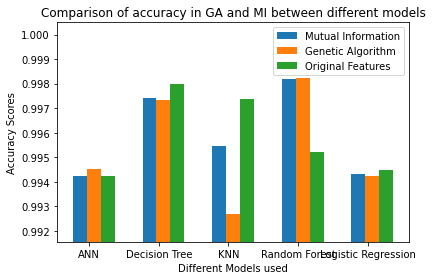

In [75]:
labels = ['ANN', 'Decision Tree', 'KNN', 'Random Forest', 'Logistic Regression']
OG_means = [0.994225, 0.998, 0.997375, 0.995225, 0.994475]
MI_means = [0.994225, 0.9974, 0.99545, 0.9982, 0.9943]
GA_means = [0.994525, 0.99735, 0.992675, 0.99825, 0.994225]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 2*width/3, MI_means, width, label='Mutual Information')
rects2 = ax.bar(x + width/3, GA_means, width, label='Genetic Algorithm')
rects3 = ax.bar(x + 4*width/3, OG_means, width, label='Original Features')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy Scores')
ax.set_xlabel('Different Models used')
ax.set_title('Comparison of accuracy in GA and MI between different models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in rects, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# autolabel(rects1)
# autolabel(rects2)
# autolabel(rects3)

ax.set_ylim(bottom=0.99155, top=1.0005)
fig.tight_layout()

plt.show()

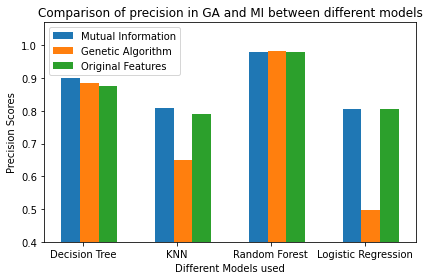

In [24]:
labels = ['Decision Tree', 'KNN', 'Random Forest', 'Logistic Regression']
OG_means = [0.8744716715306431, 0.7898642786571859, 0.9806663072264878, 0.8049039014602823]
MI_means = [0.9011222392984204, 0.8084264516846169, 0.9806663072264878, 0.8049039014602823]
GA_means = [0.8857839954701364, 0.6508408634538152, 0.9818554845080696, 0.4971125]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 2*width/3, MI_means, width, label='Mutual Information')
rects2 = ax.bar(x + width/3, GA_means, width, label='Genetic Algorithm')
rects3 = ax.bar(x + 4*width/3, OG_means, width, label='Original Features')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Precision Scores')
ax.set_xlabel('Different Models used')
ax.set_title('Comparison of precision in GA and MI between different models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in rects, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


ax.set_ylim(bottom=0.4, top=1.07)
fig.tight_layout()

plt.show()